In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
columnnames = ['y_exit', 'z_exit', 'x_start', 'y_start', 'z_start', 'px_start', 'py_start', 'pz_start', 'reflCoCl', 'reflClCl', 'wl','gpsPosX', 'length_core', 'length_clad', 'rayleighScatterings']

data = pd.DataFrame()

for i in range(0,1199):
    df_i = pd.read_csv('Daten/job_{}.txt'.format(i), sep='\t', skiprows=1, names = columnnames)
    df_i['jobnumber'] = i
    data = pd.concat([data, df_i])
data.head(10)

,y_exit,z_exit,x_start,y_start,z_start,px_start,py_start,pz_start,reflCoCl,reflClCl,wl,gpsPosX,length_core,length_clad,rayleighScatterings,jobnumber
0,-0.026978,-0.061619,2400.019897,-0.051878,0.096635,0.948434,0.162628,-0.272077,3649.0,0.0,472.743103,2400.0,2530.557861,0.000000,0.0,0
1,-0.055254,0.050902,2400.000732,0.085666,0.015889,0.977825,-0.139056,-0.156593,2674.0,0.0,504.521210,2400.0,2454.456055,0.000000,0.0,0
2,0.049212,0.065583,2399.990967,0.006511,-0.025208,0.917937,-0.225034,0.326729,0.0,3894.0,442.621185,2400.0,2204.132568,381.522583,0.0,0
3,-0.018177,-0.106197,2400.062012,-0.043234,-0.098842,0.885576,0.074564,-0.458470,0.0,5517.0,484.213989,2400.0,2210.260498,466.030212,0.0,0
4,0.050591,0.043467,2400.000977,-0.004035,-0.069628,0.971248,-0.103995,-0.214154,2757.0,0.0,489.916565,2400.0,2470.986084,0.000000,0.0,0
5,0.016537,0.030342,2487.261475,0.037348,0.037756,0.947609,0.023118,0.318594,4014.0,0.0,527.115417,2400.0,2624.865234,0.000000,0.0,0
6,0.074679,-0.021847,2400.000244,0.095372,0.006802,0.933133,-0.234433,-0.272586,5341.0,0.0,483.546570,2400.0,2571.967773,0.000000,0.0,0
7,-0.053192,0.130051,2400.111084,-0.218732,0.190087,0.802544,0.382174,-0.458113,0.0,9070.0,440.189850,2400.0,2463.961426,489.392395,0.0,0
8,-0.190717,-0.006167,2399.867798,-0.329062,0.064007,0.941782,0.242314,0.233088,5993.0,0.0,453.063904,2400.0,2548.252441,0.000000,0.0,0
9,-0.044855,-0.030424,2411.614746,-0.035966,0.083363,0.956600,-0.195042,0.216504,3463.0,0.0,456.884094,2400.0,2521.028564,0.000000,0.0,0


(-0.1, 55)

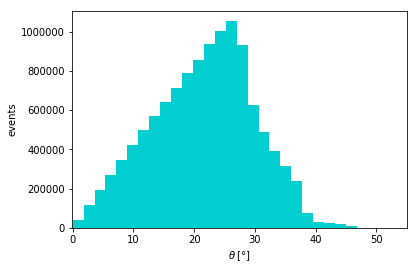

In [4]:
data['theta']= np.arccos(data['px_start'])
plt.hist(data['theta']*(360/2/np.pi), color='darkturquoise', bins=100)
plt.xlabel(r'$\theta\;$[°]')
plt.ylabel(r'events')
plt.xlim(-0.1, 55)

(-0.01, 0.5)

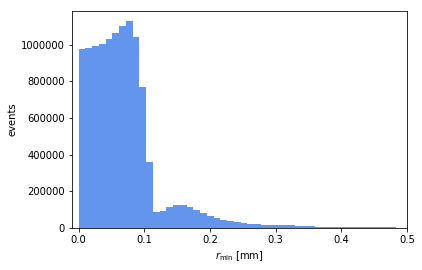

In [5]:
data['r_min'] = (np.abs(data['pz_start']*data['y_start']-data['py_start']*data['z_start']))/np.sqrt(data['pz_start']**2 + data['py_start']**2)
plt.hist(data['r_min'], color='cornflowerblue', bins=100)
plt.xlabel(r'$r_\mathrm{min}\;$[mm]')
plt.ylabel(r'events')
plt.xlim(-0.01, 0.5)

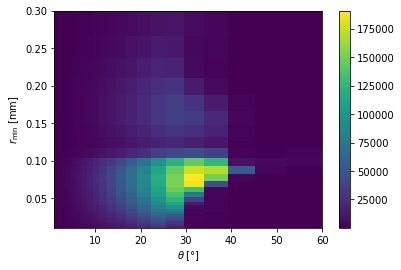

In [94]:
matrix_r, theta_r, r_min, image = plt.hist2d(data['theta']*(360/2/np.pi), data['r_min'], cmap='viridis', bins=[
                                             np.logspace(np.log10(1),np.log10(60),30),
                                             np.logspace(np.log10(0.01),np.log10(0.3),30),
                                         ])
plt.ylabel(r'$r_\mathrm{min}\;$[mm]')
plt.xlabel(r'$\theta\;$[°]')
#plt.xscale('log')
#plt.yscale('log')
plt.colorbar()

In [37]:
#matrix_r.shape

In [95]:
mean_r_min = []
for i in range(0,len(theta_r)-1):
    sum = 0.0
    ctr = 0.0
    for j in range(0,len(r_min)-1):
        sum += matrix_r[i,j]*r_min[j]
        ctr += matrix_r[i,j]
    mean_r_min.append(sum/ctr)
#mean_r_min

Text(0.5, 0, '$\\theta\\;$[°]')

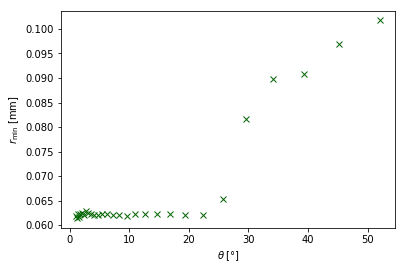

In [101]:
plt.plot(theta_r[:len(theta_r)-1], mean_r_min, color = 'darkgreen', linestyle='', marker ='x')
plt.ylabel(r'$r_\mathrm{min}\;$[mm]')
plt.xlabel(r'$\theta\;$[°]')

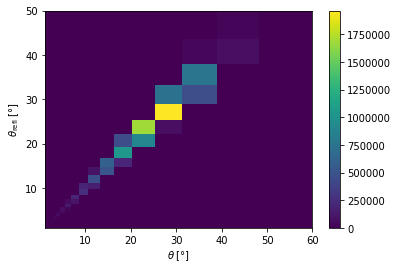

In [90]:
r_Kern = 110 #Mikrometer
data['theta_refl'] = np.arcsin(np.sqrt(1-((data['r_min']**2)/(r_Kern**2)))*np.sin(data['theta']))
matrix, theta, theta_refl, image = plt.hist2d(data['theta']*(360/2/np.pi), data['theta_refl']*(360/2/np.pi),cmap='viridis', bins=[
                                             np.logspace(np.log10(1),np.log10(60),20),
                                             np.logspace(np.log10(1),np.log10(50),30),
                                         ])
plt.ylabel(r'$\theta_\mathrm{refl}\;$[°]')
plt.xlabel(r'$\theta\;$[°]')
#plt.xscale('log')
#plt.yscale('log')
plt.colorbar()

In [102]:
mean_theta_refl = []
for i in range(0,len(theta)-1):
    sum = 0.0
    ctr = 0.0
    for j in range(0,len(theta_refl)-1):
        sum += matrix[i,j]*theta_refl[j]
        ctr += matrix[i,j]
    mean_theta_refl.append(sum/ctr)


Text(0.5, 0, '$\\theta\\;$[°]')

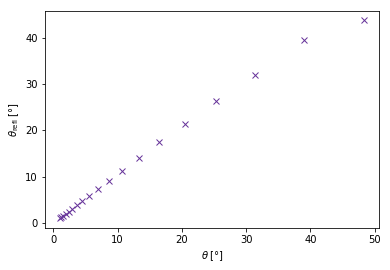

In [103]:
plt.plot(theta[:len(theta)-1], mean_theta_refl, color = 'rebeccapurple', linestyle='', marker ='x')
plt.ylabel(r'$\theta_\mathrm{refl}\;$[°]')
plt.xlabel(r'$\theta\;$[°]')

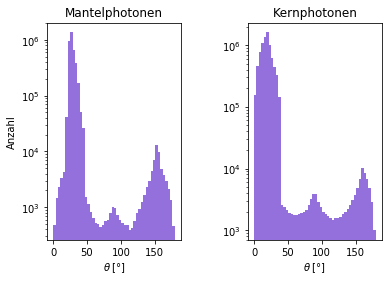

In [104]:
photon_mantel = data.loc[data['length_clad']>0]
photon_kern = data.loc[data['length_clad']==0]
plt.subplot(1,2,1)
array_m, bins_m, patches_m = plt.hist(photon_mantel['theta']*(360/2/np.pi), bins = 50, color ='mediumpurple')
plt.title(r'Mantelphotonen')
plt.xlabel(r'$\theta\;$[°]')
plt.ylabel(r'Anzahl')
plt.yscale('log')

plt.subplot(1,2,2)
array_c, bins_c, patches_c = plt.hist(photon_kern['theta']*(360/2/np.pi), bins = 50, color = 'mediumpurple')
plt.title(r'Kernphotonen')
plt.xlabel(r'$\theta\;$[°]')
plt.yscale('log')

plt.subplots_adjust(wspace = 0.5)

In [ ]:
#----------------Größte Winkel mit nur Kernphotonen------------

In [31]:
#theta_photon_just_core = []
#photon_core_theta = photon_kern['theta'].values
#photon_mantel_theta = photon_mantel['theta'].values
#for i in range(0, len(photon_kern)-1):
 #   if (photon_core_theta[i] in photon_mantel_theta):
 #       continue
  #  else:
   #     theta_photon_just_core.append(photon_core_theta[i])
#theta_photon_just_core_max = np.max(theta_photon_just_core)
#theta_photon_just_core_max

Text(0.5, 0, '$\\theta\\;$[°]')

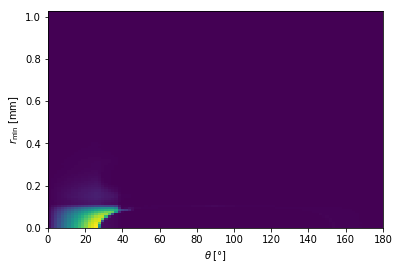

In [105]:
#Gleicher Plot wie vorher nur mit anderem binning?
matrix_r, theta_r, r_min, image = plt.hist2d(data['theta']*(360/2/np.pi), data['r_min'], cmap='viridis', bins=100)
plt.ylabel(r'$r_\mathrm{min}\;$[mm]')
plt.xlabel(r'$\theta\;$[°]')

In [106]:
r_min_max = []
theta_max = []
for i in range(0, len(r_min)-1):
    for j in range(0, len(theta_r)-1):
        if matrix_r[j,i] ==0:
            theta_max.append(theta_r[j-1])
            r_min_max.append(i)
            break

Text(0, 0.5, '$\\theta_\\mathrm{max}\\;$[°]')

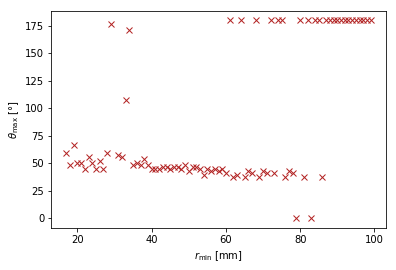

In [107]:
plt.plot(r_min_max, theta_max, color = 'firebrick', marker = 'x', linestyle = '')
plt.xlabel(r'$r_\mathrm{min}\;$[mm]')
plt.ylabel(r'$\theta_\mathrm{max}\;$[°]')
